In [56]:
# Basic Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preprocessing
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MultiLabelBinarizer
from sklearn.utils import resample

# New for Balancing
#%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter

# New for Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# New classifier
#%pip install xgboost
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate


#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## research questions: 
1. How well does machine learning predict children’s happiness based on mobile phone usage and the level of attention in Burkina Faso?
2. What is the relationship between mobile phone usage and children’s attention levels in a context of how long they have had a mobile phone?

In [57]:
# Load data set
df = pd.read_csv('BF_ML_ready.csv')
df

,ID,Age,Class,Sex_binary,Attention_Score,Happiness_Score,PhoneUse_Score,A1,A2,A3,...,T12,T13,T14,school every day,share phone family,electricity at home,parents rules phone,Phone purpose,Phone_total_months,Has_phone
0,1,15,10,1,2.266667,3.166667,4.583333,1,4,1,...,4,0.0,4.0,0,0,1,0,Communication,4.0,1.0
1,2,14,10,0,3.000000,3.583333,4.250000,1,4,4,...,4,1.0,0.0,0,0,0,0,"School, Games",12.0,1.0
2,3,14,10,1,1.333333,3.000000,1.083333,1,1,1,...,1,0.0,0.0,0,0,0,0,Communication,0.0,0.0
3,4,15,10,1,2.000000,2.916667,3.916667,1,1,4,...,3,1.0,0.0,0,1,0,0,School,12.0,1.0
4,5,16,10,0,2.066667,2.666667,3.833333,3,3,1,...,2,16.0,0.0,0,0,1,0,Communication,192.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,670,22,13,1,1.333333,2.666667,3.166667,1,1,1,...,4,1.0,0.0,0,0,0,0,Communication,12.0,1.0
668,671,18,13,1,1.733333,2.750000,3.583333,1,1,1,...,6,6.0,0.0,0,0,1,0,Music,72.0,1.0
669,672,20,13,1,2.333333,2.333333,3.500000,1,2,1,...,4,3.0,6.0,0,0,0,0,Communication,42.0,1.0
670,673,20,13,1,2.000000,2.833333,2.250000,1,4,1,...,1,0.0,1.0,0,0,0,0,School,1.0,1.0


In [58]:
##dropping all the Happiness items features except for the Happiness average score
df.drop(columns=['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12'], inplace=True)
df.head(10)

,ID,Age,Class,Sex_binary,Attention_Score,Happiness_Score,PhoneUse_Score,A1,A2,A3,...,T12,T13,T14,school every day,share phone family,electricity at home,parents rules phone,Phone purpose,Phone_total_months,Has_phone
0,1,15,10,1,2.266667,3.166667,4.583333,1,4,1,...,4,0.0,4.0,0,0,1,0,Communication,4.0,1.0
1,2,14,10,0,3.000000,3.583333,4.250000,1,4,4,...,4,1.0,0.0,0,0,0,0,"School, Games",12.0,1.0
2,3,14,10,1,1.333333,3.000000,1.083333,1,1,1,...,1,0.0,0.0,0,0,0,0,Communication,0.0,0.0
3,4,15,10,1,2.000000,2.916667,3.916667,1,1,4,...,3,1.0,0.0,0,1,0,0,School,12.0,1.0
4,5,16,10,0,2.066667,2.666667,3.833333,3,3,1,...,2,16.0,0.0,0,0,1,0,Communication,192.0,1.0
5,6,16,10,1,1.933333,2.916667,4.333333,1,1,2,...,6,0.0,0.0,0,0,0,1,School,0.0,0.0
6,7,15,10,0,2.400000,2.750000,2.583333,3,4,1,...,1,2.0,4.0,0,0,0,0,"Games, Other",28.0,1.0
7,8,18,10,0,2.066667,3.166667,4.500000,1,2,2,...,4,2.0,0.0,0,0,0,0,Communication,24.0,1.0
8,9,16,10,1,2.466667,3.083333,4.166667,1,1,4,...,5,0.0,2.0,0,0,0,0,Music,2.0,1.0
9,10,16,10,0,2.000000,2.666667,2.916667,1,1,1,...,1,14.0,0.0,0,1,0,0,School,168.0,1.0


## Encoding
Encoding Happiness score into binary number 

In [59]:
df_encoded = df.copy()

# Step 2: Convert Happiness_Score into ordinal bins (0, 1,)
df_encoded['Happiness_Level'] = pd.cut(
    df_encoded['Happiness_Score'],
    bins=[0.00, 2.90, 4.00],
    labels=[0, 1,],
    include_lowest=True,
    right=True
).astype(int)

# Step 3: (Optional) drop the continuous score if you only want the ordinal level
df_encoded = df_encoded.drop(columns=['Happiness_Score'])

# Check result
print(df_encoded[['Happiness_Level']].head())
print(df_encoded[['Happiness_Level']].value_counts())



   Happiness_Level
0                1
1                1
2                1
3                1
4                0
Happiness_Level
0                  391
1                  281
Name: count, dtype: int64


## Encoding: phone_purpose in different features

In [ ]:

# --- prefix + labels ---
PREFIX = "phone purpose: "
base_labels = ["School", "Communication", "Games", "Social Media", "Music"]
phone_cols = [f"{PREFIX}{c}" for c in base_labels]
other_col  = f"{PREFIX}Other"

# ---- helper: normalize & split ----
variant_map = {
    "school":"School","study":"School","education":"School",
    "communication":"Communication","call":"Communication","calls":"Communication",
    "chat":"Communication","messaging":"Communication","texting":"Communication","sms":"Communication","whatsapp":"Communication",
    "games":"Games","game":"Games","gaming":"Games",
    "social media":"Social Media","social":"Social Media","instagram":"Social Media","facebook":"Social Media","tiktok":"Social Media","snapchat":"Social Media",
    "music":"Music","songs":"Music","spotify":"Music","audio":"Music",
    "other":"Other",
}
def normalize_and_split(x):
    if pd.isna(x): return []
    toks = [t.strip() for t in str(x).replace(";", ",").split(",") if t.strip() != ""]
    out = []
    for t in toks:
        k = " ".join(t.lower().split())
        out.append(variant_map.get(k, t))
    return out

# the column name
col = "Phone purpose" 

# 1) lists of purposes
lists = df[col].apply(normalize_and_split)

# 2) multi-hot for the 5 known categories
mlb = MultiLabelBinarizer(classes=base_labels)
multi = mlb.fit_transform(lists)
multi_df = pd.DataFrame(multi, columns=phone_cols, index=df.index).astype("int8")

# 3) "Other" (prefixed!)
known = set(base_labels)
multi_df[other_col] = lists.apply(
    lambda items: int(any((it not in known) or (it == "Other") for it in items))
).astype("int8")

# 4) merge
df_encoded = pd.concat([df.drop(columns=[col]), multi_df], axis=1)

# sanity check: these columns should now exist
df_encoded[phone_cols + [other_col]].head()

# --- Drop the original column if it still exists ---
if "Phone purpose" in df.columns:
    df = df.drop(columns=["Phone purpose"])

# --- Combine (merge) the new encoded data with your main df ---
# Assuming df_encoded was built from df originally, we can align by index:
df_final = pd.concat([df, df_encoded.filter(like="phone purpose:")], axis=1)

# --- Optional: sanity check ---
print("✅ Combined DataFrame shape:", df_final.shape)
print("✅ Columns added:", [c for c in df_final.columns if c.startswith("phone purpose:")])
df_final.head()


✅ Combined DataFrame shape: (672, 48)
✅ Columns added: ['phone purpose: School', 'phone purpose: Communication', 'phone purpose: Games', 'phone purpose: Social Media', 'phone purpose: Music', 'phone purpose: Other']


,ID,Age,Class,Sex_binary,Attention_Score,Happiness_Score,PhoneUse_Score,A1,A2,A3,...,electricity at home,parents rules phone,Phone_total_months,Has_phone,phone purpose: School,phone purpose: Communication,phone purpose: Games,phone purpose: Social Media,phone purpose: Music,phone purpose: Other
0,1,15,10,1,2.266667,3.166667,4.583333,1,4,1,...,1,0,4.0,1.0,0,1,0,0,0,0
1,2,14,10,0,3.000000,3.583333,4.250000,1,4,4,...,0,0,12.0,1.0,1,0,1,0,0,0
2,3,14,10,1,1.333333,3.000000,1.083333,1,1,1,...,0,0,0.0,0.0,0,1,0,0,0,0
3,4,15,10,1,2.000000,2.916667,3.916667,1,1,4,...,0,0,12.0,1.0,1,0,0,0,0,0
4,5,16,10,0,2.066667,2.666667,3.833333,3,3,1,...,1,0,192.0,1.0,0,1,0,0,0,0


In [55]:
# Separating data and target variable 
# target variable
y = df['Happiness_Level']

# data without target variable
X = df.drop(columns='Happiness_Level')
print(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)
y.value_counts(normalize=True)
#results require balancing 
df=df_final.copy()


KeyError: 'Happiness_Level'

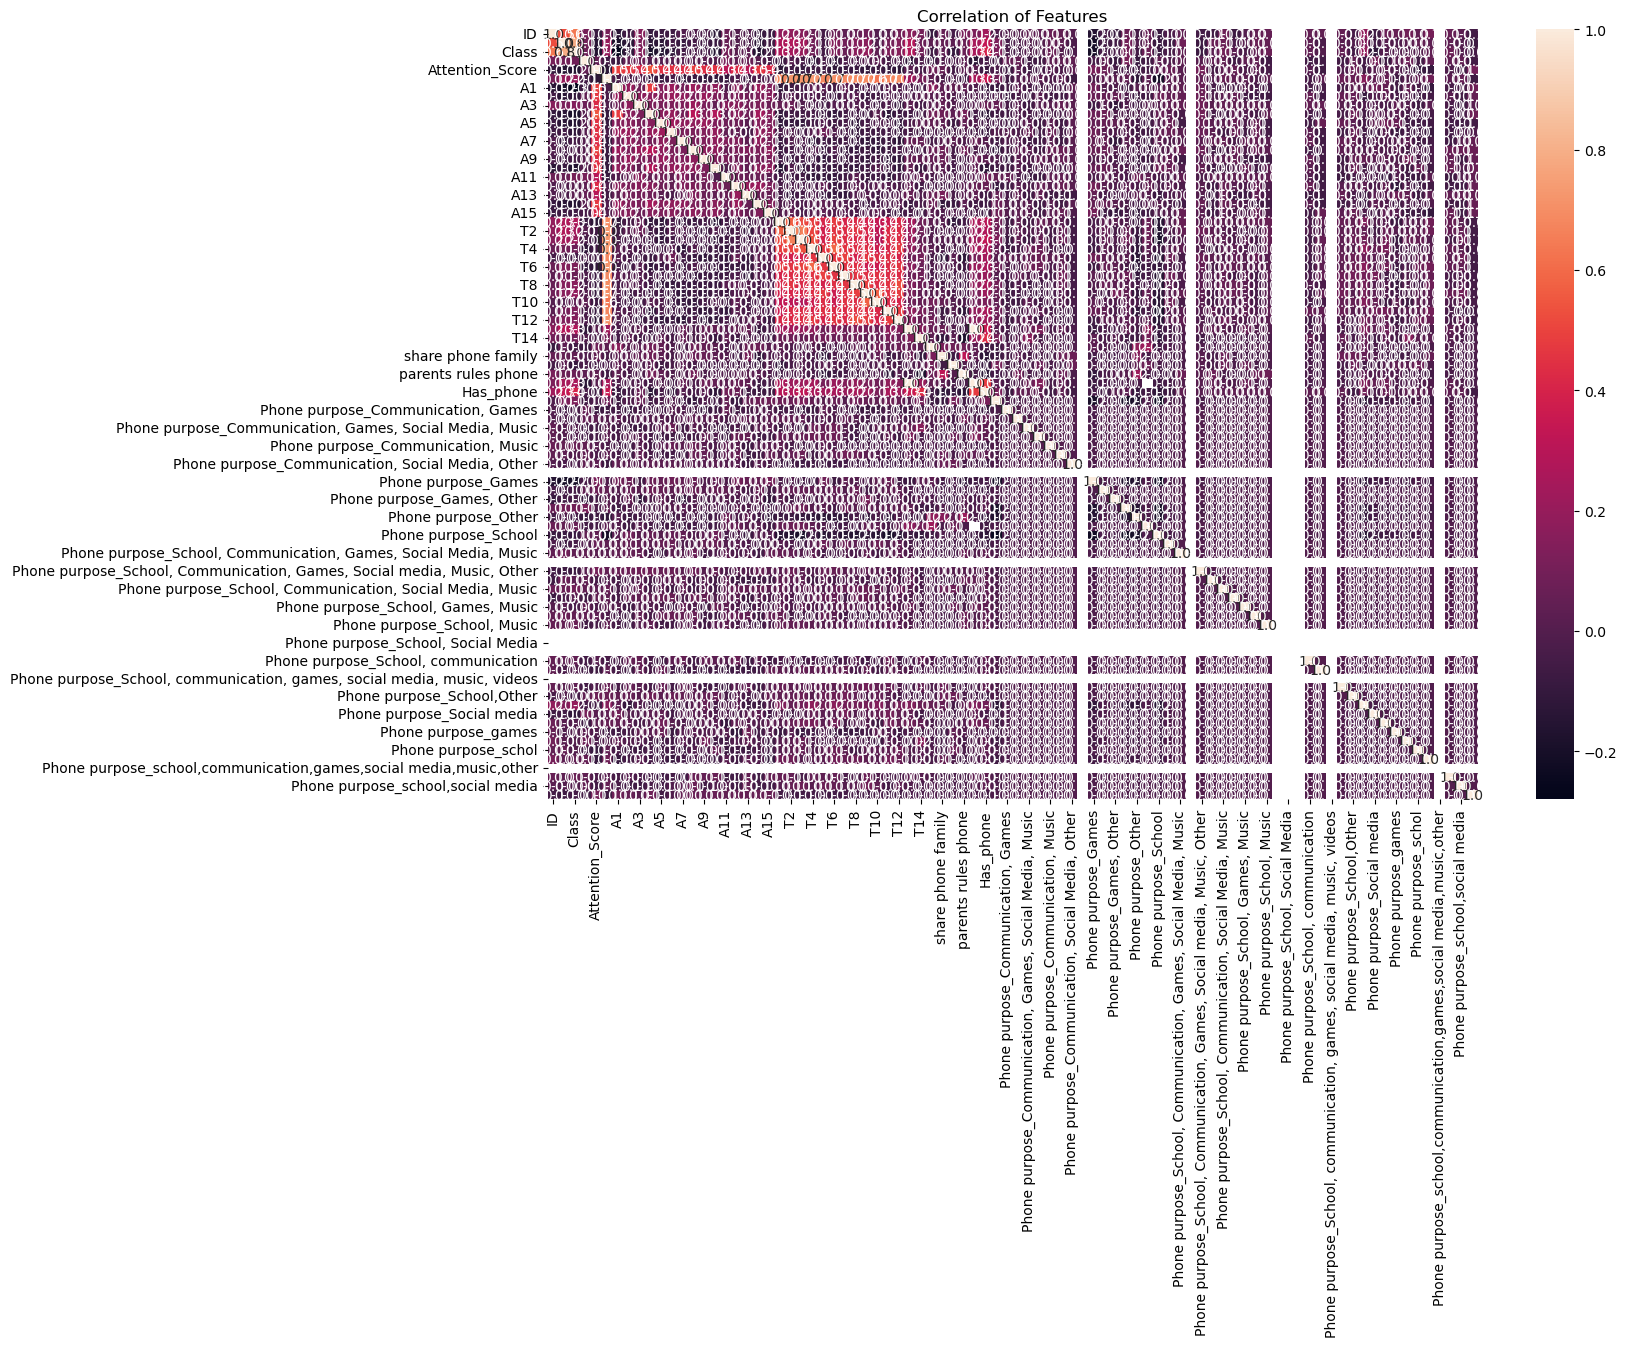

KeyError: 'Happiness_Level'

In [16]:
y_train_named = y_train.rename('Happiness_Level')   # <- IMPORTANT

# 1) Combine X and y for correlation (train only)
df_train = pd.concat([X_train, y_train_named], axis=1)

# 2) Correlation heatmap (optional)
plt.figure(figsize=(15, 10))
correlation_matrix = df_train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
plt.title('Correlation of Features')
plt.show()

# 3) Rank features by absolute correlation with the target (drop the target itself)
corr_with_target = (
    correlation_matrix['Happiness_Level']
    .drop('Happiness_Level')            # <- remove target so it doesn't end up in top list
    .abs()
    .sort_values(ascending=False)
)

# 4) Choose exactly top 10 feature names
top_10 = corr_with_target.head(10).index

# 5) Guard against typos/mismatch (optional, but safe)
top_10 = [c for c in top_10 if c in X_train.columns]




#plt.figure(figsize=(15, 10))
#correlation_matrix = df_train.corr()
#sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
#plt.title('Correlation of Features')
#plt.show()

#top_10 = correlation_matrix['Happiness_Level'].abs().sort_values(ascending=False)[:11].index
df_correlation = df_train[top_10]
df_correlation.head(10)

# Merge target for correlation
#train_corr = X_train.copy()
#train_corr['Happiness_Level'] = y_train

# Compute correlation
#corr = train_corr.corr()['Happiness_Level'].abs().sort_values(ascending=False)

#corr_with_target = train_corr.corr(numeric_only=True)['Happiness_Level'].drop('Happiness_Level')
#corr_with_target_abs = corr_with_target.abs().sort_values(ascending=False)

#print("Top correlations with Happiness_Level:\n")
#print(corr_with_target_abs.head(15))



## Balancing 

In [15]:

X_train_sel = X_train[top_10]
X_test_sel  = X_test[top_10]

#Fill in all NaN values with 0 
X_train_sel = X_train_sel.fillna(0)
X_test_sel  = X_test_sel.fillna(0)

df_smote = SMOTE(random_state=42, k_neighbors=3)
X_train_bal, y_train_bal = df_smote.fit_resample(X_train_sel, y_train)

print("Before balancing:", Counter(y_train))
print("After balancing:", Counter(y_train_bal))




NameError: name 'X_train' is not defined

In [ ]:


#X_train = X_train.fillna(0)
#X_test  = X_test.fillna(0)

#X_train_sel = X_train[top_10]
#X_test_sel = X_test[top_10]


# Apply SMOTE only to the training set
#df_smote = SMOTE(random_state=42, k_neighbors=3)  
#X_train_bal, y_train_bal = df_smote.fit_resample(X_train_sel, y_train)

#print("Before balancing:", Counter(y_train))
#print("After balancing:", Counter(y_train_bal))

##Hyperparameter optimization (Random Forest)

#dt_base = DecisionTreeClassifier(random_state=42)
#dt_base.fit(X_train_bal, y_train_bal)
#y_pred_base = dt_base.predict(X_test_bal)
#print("Baseline F1 (macro):", f1_score(y_test, y_pred_base, average='macro'))

# 2) Define parameter grid (similar to your example)
#param_grid = [{
   # 'criterion': ['gini', 'entropy'],
    #'splitter': ['best'],
    #'max_depth': [5, 10, 15, 20, None],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': [None, 'sqrt'],
    #'class_weight': [None, 'balanced']
}]

#grid = RandomizedSearchCV(
 #   estimator=DecisionTreeClassifier(random_state=42),
  #  param_distributions=param_grid[0],
   # n_iter=50,              # test 50 random combos
   # cv=5,
   # scoring='f1_macro',
   # n_jobs=-1,
    #random_state=42,
)

## Classification
Finding out which works best

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search.fit(X_train_bal, y_train_bal)

best_dt = search.best_estimator_
print("Best parameters:", search.best_params_)
print("Best CV F1:", search.best_score_)

# Evaluate on test set
y_pred = best_dt.predict(X_test_sel)
print(classification_report(y_test, y_pred, digits=3))

In [ ]:

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search.fit(X_train_bal, y_train_bal)

best_rf = search.best_estimator_
print("Best parameters:", search.best_params_)
print("Best CV F1:", search.best_score_)

# Evaluate
y_pred = best_rf.predict(X_test_sel)
print(classification_report(y_test, y_pred, digits=3))

In [ ]:

xgb = XGBClassifier(random_state=42, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 1.5, 2]
}

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search.fit(X_train_bal, y_train_bal)

best_xgb = search.best_estimator_
print("Best parameters:", search.best_params_)
print("Best CV F1:", search.best_score_)

# Evaluate on test
y_pred = best_xgb.predict(X_test_sel)
print(classification_report(y_test, y_pred, digits=3))

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

# ---------------- Decision Tree ----------------
dt = DecisionTreeClassifier(random_state=42)
dt_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}
dt_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=dt_param,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
dt_search.fit(X_train_bal, y_train_bal)
best_dt = dt_search.best_estimator_
y_pred_dt = best_dt.predict(X_test_sel)

print("\n=== Decision Tree ===")
print("Best params:", dt_search.best_params_)
print("Best CV F1:", round(dt_search.best_score_, 4))
print(confusion_matrix(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


results.append({
    'Model': 'DecisionTree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision(macro)': precision_score(y_test, y_pred_dt, average='macro', zero_division=0),
    'Recall(macro)': recall_score(y_test, y_pred_dt, average='macro', zero_division=0),
    'F1(macro)': f1_score(y_test, y_pred_dt, average='macro', zero_division=0),
})

# ---------------- Random Forest ----------------
rf = RandomForestClassifier(random_state=42)
rf_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rf_search.fit(X_train_bal, y_train_bal)
best_rf = rf_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_sel)

print("\n=== Random Forest ===")
print("Best params:", rf_search.best_params_)
print("Best CV F1:", round(rf_search.best_score_, 4))
print(confusion_matrix(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


results.append({
    'Model': 'RandomForest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision(macro)': precision_score(y_test, y_pred_rf, average='macro', zero_division=0),
    'Recall(macro)': recall_score(y_test, y_pred_rf, average='macro', zero_division=0),
    'F1(macro)': f1_score(y_test, y_pred_rf, average='macro', zero_division=0),
})

# ---------------- XGBoost ----------------
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1.0, 1.5, 2.0],
}
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
xgb_search.fit(X_train_bal, y_train_bal)
best_xgb = xgb_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_sel)

print("\n=== XGBoost ===")
print("Best params:", xgb_search.best_params_)
print("Best CV F1:", round(xgb_search.best_score_, 4))
print(confusion_matrix(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

results.append({
    'Model': 'XGBClassifier',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision(macro)': precision_score(y_test, y_pred_xgb, average='macro', zero_division=0),
    'Recall(macro)': recall_score(y_test, y_pred_xgb, average='macro', zero_division=0),
    'F1(macro)': f1_score(y_test, y_pred_xgb, average='macro', zero_division=0),
})

# ---------------- Comparison table ----------------
results_df = pd.DataFrame(results).sort_values('F1(macro)', ascending=False).reset_index(drop=True)
print("\n=== Model Comparison (Test Set) ===")
print(results_df.to_string(index=False))